In [1]:
import pandas as pd
import logging

In [2]:
# Configure the logger
logging.basicConfig(
    filename='model.log',            # Log file name
    level=logging.INFO,              # Set the logging level (DEBUG, INFO, WARNING, ERROR, CRITICAL)
    format='%(asctime)s - %(levelname)s - %(message)s',  # Log message format
    filemode='w'                     # Overwrite the log file on each run
)

# Create a logger object
logger = logging.getLogger('model_logger')


In [3]:
logger.info("load dataset...")
df = pd.read_csv("train_data.csv")

In [4]:
df.head()

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


In [5]:
new_df = df.copy()

In [6]:
# data preprocessing
logger.info("data preprocessing...")
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          813 non-null    object 
 1   Petrol (USD)  811 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.8+ KB


In [7]:
new_df.describe()

,Petrol (USD)
count,811.000000
mean,110.330481
std,19.241182
min,74.210000
25%,94.525000
50%,112.420000
75%,128.560000
max,189.510000


In [8]:
new_df.dtypes

Date             object
Petrol (USD)    float64
dtype: object

In [9]:
new_df['Date'] = pd.to_datetime(new_df['Date'])


In [10]:
new_df.head()

,Date,Petrol (USD)
0,2003-06-09,74.59
1,2003-06-16,74.47
2,2003-06-23,74.42
3,2003-06-30,74.35
4,2003-07-07,74.28


In [11]:
new_df['Day'] = new_df['Date'].dt.day
new_df['month'] = new_df['Date'].dt.month
new_df['year'] = new_df['Date'].dt.year
new_df.head()

,Date,Petrol (USD),Day,month,year
0,2003-06-09,74.59,9,6,2003
1,2003-06-16,74.47,16,6,2003
2,2003-06-23,74.42,23,6,2003
3,2003-06-30,74.35,30,6,2003
4,2003-07-07,74.28,7,7,2003


In [12]:
new_df.head()

,Date,Petrol (USD),Day,month,year
0,2003-06-09,74.59,9,6,2003
1,2003-06-16,74.47,16,6,2003
2,2003-06-23,74.42,23,6,2003
3,2003-06-30,74.35,30,6,2003
4,2003-07-07,74.28,7,7,2003


In [13]:
new_df.isnull().sum()

Date            0
Petrol (USD)    2
Day             0
month           0
year            0
dtype: int64

In [14]:
new_df.dropna(inplace = True)

In [15]:
new_df.drop(['Date'],axis=1,inplace=True)

In [16]:
new_df.isnull().sum()

Petrol (USD)    0
Day             0
month           0
year            0
dtype: int64

In [17]:
new_df.duplicated().sum()

0

In [18]:
new_df['Petrol (USD)'].duplicated().sum()

57

In [19]:
new_df.dtypes

Petrol (USD)    float64
Day               int32
month             int32
year              int32
dtype: object

In [20]:
new_df.corr()

,Petrol (USD),Day,month,year
Petrol (USD),1.000000,0.012748,0.021090,0.694848
Day,0.012748,1.000000,0.002288,-0.001706
month,0.021090,0.002288,1.000000,-0.042940
year,0.694848,-0.001706,-0.042940,1.000000


c:\Users\jha02\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


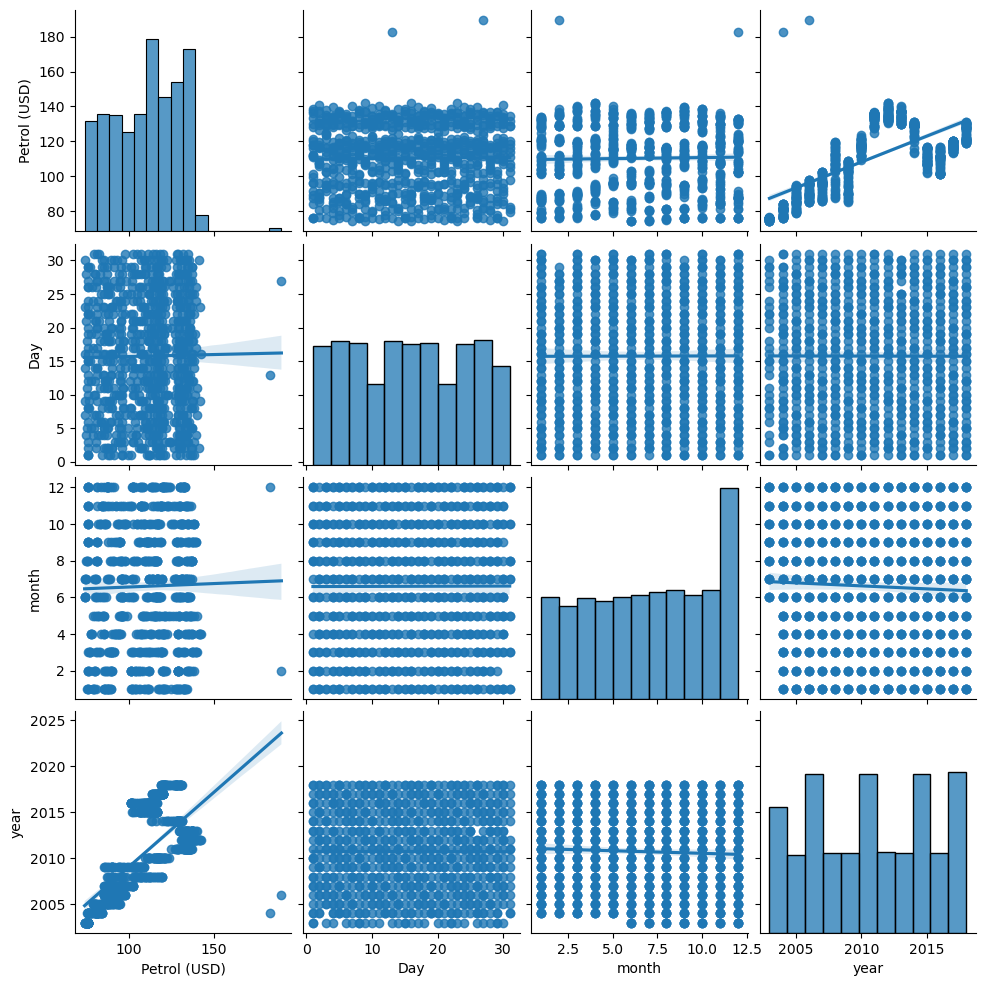

In [21]:
# data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.pairplot(data = new_df,kind='reg')
plt.show()

<Axes: xlabel='year', ylabel='Petrol (USD)'>

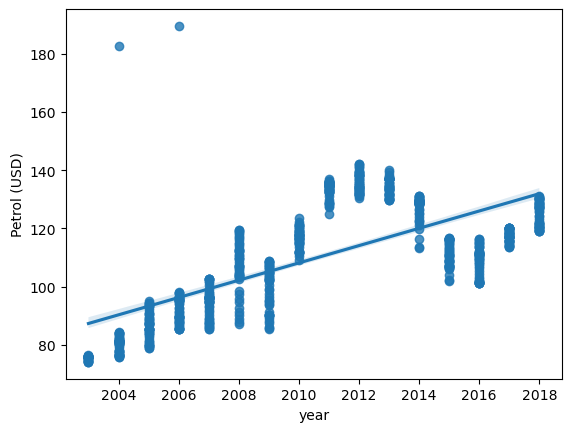

In [22]:
sns.regplot(data = new_df,x= new_df["year"],y=new_df["Petrol (USD)"])

In [23]:
# model training
logger.info("splitting the dataset into X and y...")

X = new_df.iloc[:,1:]
y = new_df.iloc[:,0]

In [24]:
X

,Day,month,year
0,9,6,2003
1,16,6,2003
2,23,6,2003
3,30,6,2003
4,7,7,2003
...,...,...,...
808,3,12,2018
809,10,12,2018
810,17,12,2018
811,24,12,2018


In [25]:
y

0       74.59
1       74.47
2       74.42
3       74.35
4       74.28
        ...  
808    124.30
809    122.37
810    121.02
811    120.61
812    120.18
Name: Petrol (USD), Length: 811, dtype: float64

In [26]:
logger.info("Training the model...")
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 1)

In [27]:
logger.info("making predictions on the test set...")
from sklearn.tree import DecisionTreeRegressor
model =DecisionTreeRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [28]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
logger.info(f"r2_Score of the model is: {score: .4f}")
print(f'r2_score is:  {score}')
logger.info("model prediction and evaluation successfully completed...") 

r2_score is:  0.991945485714152


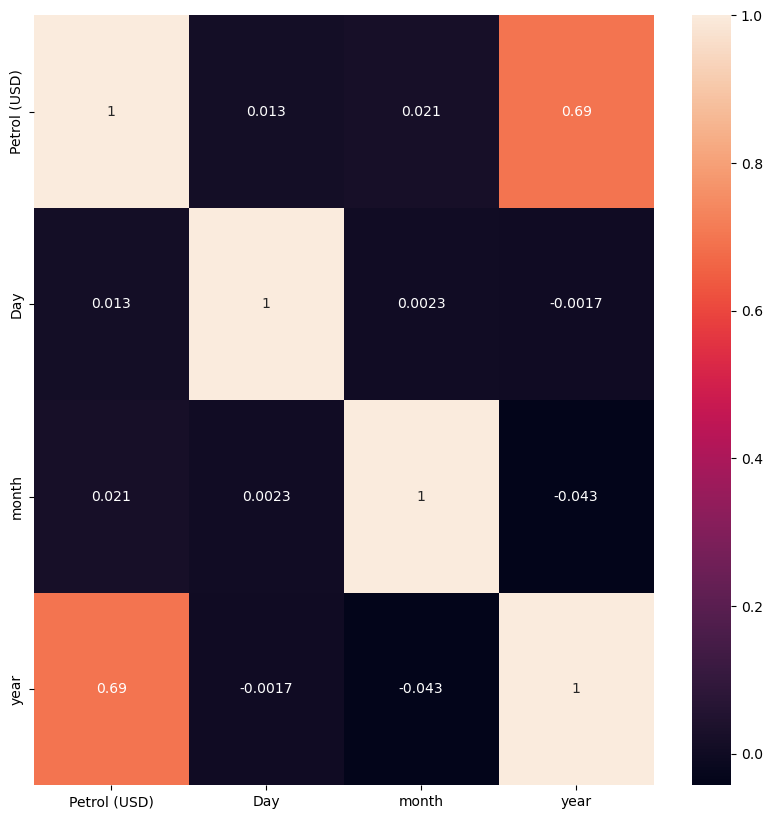

In [29]:
corr = new_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()

In [30]:
import warnings
warnings.filterwarnings('ignore')
model.predict([[17,8,2024]])   # this is a prediction of petrol price on 17-08-2024 in USD

array([128.79])

In [31]:
import pickle

pickle.dump(new_df,open("main.pkl","wb"))
pickle.dump(model,open("model.pkl","wb"))